<a href="https://colab.research.google.com/github/Anushareddy1203/final-code/blob/main/Finalcode13_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
#importing the libraries
import os
import pandas as pd
import signal
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
## Define the base path to the weather data directory in Google Drive
base_path = '/content/drive/MyDrive/weatherdata'
daily_path = os.path.join(base_path, 'daily/daily')
daily_files = [os.path.join(daily_path, f) for f in os.listdir(daily_path) if f.endswith('.txt') and f != 'README.txt']
print("Daily files:", daily_files)

Daily files: ['/content/drive/MyDrive/weatherdata/daily/daily/210824.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210819.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210826.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210901.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210830.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210903.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210829.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210904.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210831.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210905.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210828.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210902.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210906.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210911.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210908.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210912.txt', '/content/

In [4]:
## Define a custom exception class named TimeoutException, which can be raised for timeout events
class TimeoutException(Exception):
    pass
def timeout_handler(signum, frame):
    raise TimeoutException
signal.signal(signal.SIGALRM, timeout_handler)

<Handlers.SIG_DFL: 0>

In [5]:
# This script processes daily weather data files by reading them into DataFrames,
# applying specific column transformations, and consolidating them into a single DataFrame.
#It includes error handling for timeouts and other file read errors,
#ensuring that problematic files are logged while successful reads are combined into a comprehensive dataset.
def daily_reader(daily_files):
  daily_dfs = []
  daily_errors = []
  for i, file in enumerate(daily_files):
    try:
        signal.alarm(60)
        df_date = pd.read_csv(file, delim_whitespace=True, encoding='ISO-8859-1')
        date = list(df_date.columns)[0]
        if file.startswith('/content/drive/MyDrive/weatherdata/daily/daily/2'):
          req_columns = ['Time','Wind Dir','Wind Spd','Wind Gust','Hum In','Humidity','Temp In','Temp','Raw Barom','UV','Solar','Dew Point','DailyRain','RainRate']
          df = pd.read_csv(file, delim_whitespace=True, encoding='ISO-8859-1', header= 1)
          c = (df.columns)[:14]
          c = list(c)
        else:
          req_columns = ['Time','Wind Dir','Wind Spd','Hum In','Humidity','Temp In','Temp','Raw Barom','Temp Ch 1','Hum Ch 1','Temp Ch 2','Hum Ch 2','UV','Solar','Dew Point','RainRate']
          df = pd.read_csv(file, delim_whitespace=True, encoding='ISO-8859-1', header= 1)
          c = (df.columns)[:16]
          c = list(c)
        di = {}
        for i,c1 in enumerate(req_columns):
          di[c[i]] = c1
        df_f = df[c]
        df_f = pd.DataFrame(df_f)
        df_f.rename(columns=di, inplace=True)
        main_col = ['Time','Wind Dir','Wind Spd','Hum In','Humidity','Temp In','Temp','Raw Barom','UV','Solar','Dew Point','RainRate']
        df_f = df_f[main_col]
        df_f = df_f.drop(index=0)
        df_f['Date'] = pd.to_datetime(date + ' ' + df_f['Time'], format='%d/%m/%y %H:%M')
        daily_dfs.append(df_f)
    except TimeoutException:
        print(f"Timeout reading {file}")
        print(i)
        daily_errors.append(file)
    except Exception as e:
        print(f"Error reading {file}: {e}")
        daily_errors.extend(file)
    finally:
        signal.alarm(0)
  if daily_dfs:
    daily_data = pd.concat(daily_dfs, ignore_index=True)
  else:
    daily_data = pd.DataFrame()
  return daily_data, daily_errors

In [ ]:
## This code divides a list of daily weather data files into smaller parts,
#processes each part using the `daily_reader` function to read and consolidate the data, and then combines the results into a single DataFrame.
#It also tracks any files that cause errors during processing. The files are divided evenly into a specified number of parts, with any remainder files distributed
error_files = []
daily_df = pd.DataFrame()
num_parts = 11
part_size = len(daily_files) // num_parts
remainder = len(daily_files) % num_parts
start = 0
for i in range(num_parts):
  end = start + part_size + (1 if i < remainder else 0)
  df, err = daily_reader(daily_files[start:end])
  error_files.extend(err)
  start = end
  daily_df = pd.concat([daily_df, df], axis=0)

Timeout reading /content/drive/MyDrive/weatherdata/daily/daily/211011.txt
45
Error reading /content/drive/MyDrive/weatherdata/daily/daily/120825.txt: No columns to parse from file
Error reading /content/drive/MyDrive/weatherdata/daily/daily/121220.txt: Error tokenizing data. C error: Expected 30 fields in line 689, saw 31



In [ ]:
daily_df.to_csv('/content/drive/MyDrive/weatherdata/daily_data.csv')

In [6]:
daily_df = pd.read_csv('/content/drive/MyDrive/weatherdata/daily_data.csv')

In [7]:
daily_df.head()

,Unnamed: 0,Time,Wind Dir,Wind Spd,Hum In,Humidity,Temp In,Temp,Raw Barom,UV,Solar,Dew Point,RainRate,Date
0,0,0:00,314.0,3.2,50.0,94.0,19.3,11.3,1023.1,0.0,0.0,10.3,0.0,2021-08-24 00:00:00
1,1,0:01,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:01:00
2,2,0:02,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:02:00
3,3,0:03,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:03:00
4,4,0:04,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:04:00


In [8]:
# This line removes the column named 'Unnamed: 0' from the `daily_df` DataFrame if it exists.
daily_df.drop(columns=['Unnamed: 0'], inplace=True)


In [9]:
daily_df.head()

,Time,Wind Dir,Wind Spd,Hum In,Humidity,Temp In,Temp,Raw Barom,UV,Solar,Dew Point,RainRate,Date
0,0:00,314.0,3.2,50.0,94.0,19.3,11.3,1023.1,0.0,0.0,10.3,0.0,2021-08-24 00:00:00
1,0:01,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:01:00
2,0:02,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:02:00
3,0:03,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:03:00
4,0:04,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:04:00


In [10]:
daily_df['Date']= pd.to_datetime(daily_df['Date'])

In [11]:
daily_df['Day']= daily_df['Date'].dt.date
daily_df['month']= daily_df['Date'].dt.month
daily_df['year']= daily_df['Date'].dt.year

In [12]:
daily_df.head()

,Time,Wind Dir,Wind Spd,Hum In,Humidity,Temp In,Temp,Raw Barom,UV,Solar,Dew Point,RainRate,Date,Day,month,year
0,0:00,314.0,3.2,50.0,94.0,19.3,11.3,1023.1,0.0,0.0,10.3,0.0,2021-08-24 00:00:00,2021-08-24,8,2021
1,0:01,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:01:00,2021-08-24,8,2021
2,0:02,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:02:00,2021-08-24,8,2021
3,0:03,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:03:00,2021-08-24,8,2021
4,0:04,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:04:00,2021-08-24,8,2021


Exploratory Data Analysis EDA

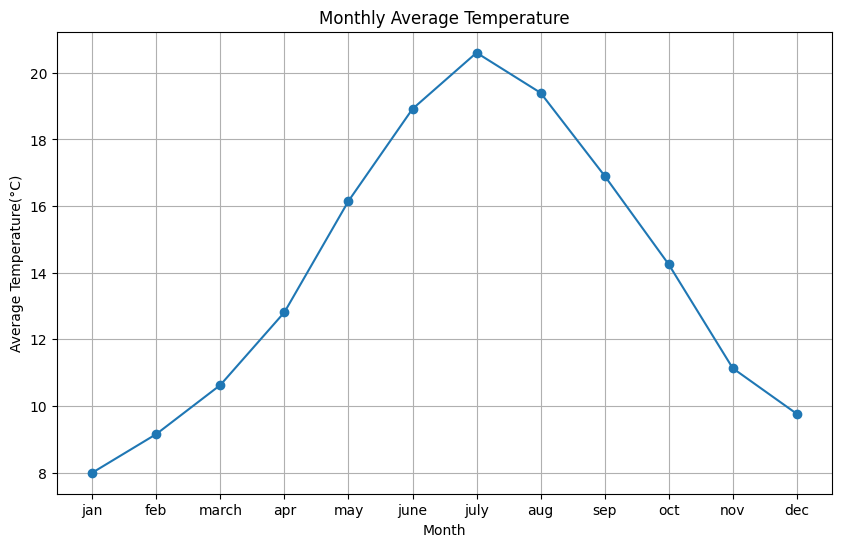

In [13]:
# This code calculates the average temperature for each month by grouping the `daily_df` DataFrame
monthly_temp= daily_df.groupby('month')['Temp'].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_temp.index, monthly_temp.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Temperature(°C)')
plt.xticks(range(1,13),['jan','feb','march','apr','may','june','july','aug','sep','oct','nov','dec'])
plt.title('Monthly Average Temperature')
plt.grid(True)
plt.show()


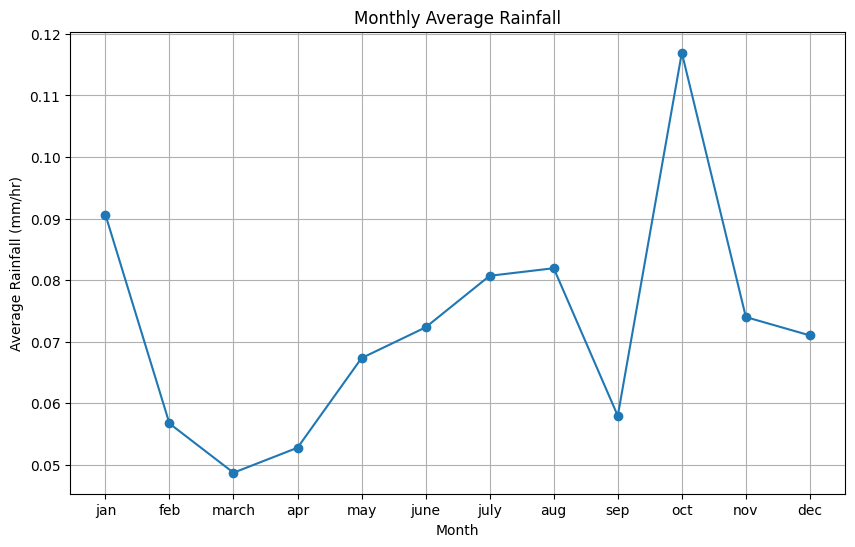

In [14]:
## This code calculates the average rainfall for each month by grouping the `daily_df` DataFrame
monthly_rainfall = daily_df.groupby('month')['RainRate'].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_rainfall.index, monthly_rainfall.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm/hr)')
plt.xticks(range(1,13),['jan','feb','march','apr','may','june','july','aug','sep','oct','nov','dec'])
plt.title('Monthly Average Rainfall')
plt.grid(True)
plt.show()

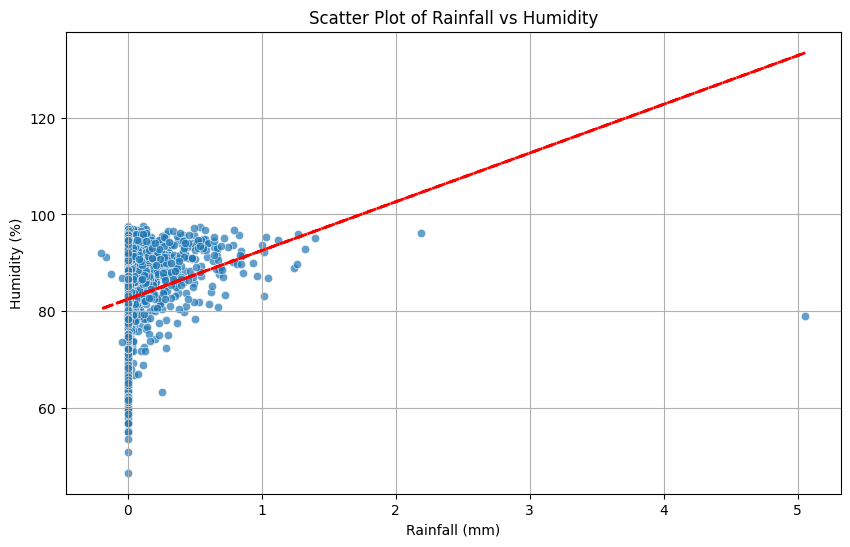

In [15]:
# A scatter plot is created to visualize the relationship between daily rainfall and humidity, with some transparency
rainfall = daily_df.groupby('Day')['RainRate'].mean()
humidity = daily_df.groupby('Day')['Humidity'].mean()

rainfall = rainfall.dropna()
humidity = humidity.dropna()

common_days = rainfall.index.intersection(humidity.index)
rainfall = rainfall.loc[common_days]
humidity = humidity.loc[common_days]

plt.figure(figsize=(10, 6))
plt.scatter(rainfall, humidity, alpha=0.7, edgecolors='w', linewidth=0.5)

try:
    coefficients = np.polyfit(rainfall, humidity, 1)
    trendline = np.poly1d(coefficients)
    plt.plot(rainfall, trendline(rainfall), color='red', linestyle='--', linewidth=2)
except np.linalg.LinAlgError:
    print("Could  fit a linear trend line. Data might be linearly dependent or have numerical issues.")

plt.title('Scatter Plot of Rainfall vs Humidity')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Humidity (%)')
plt.grid(True)

plt.show()

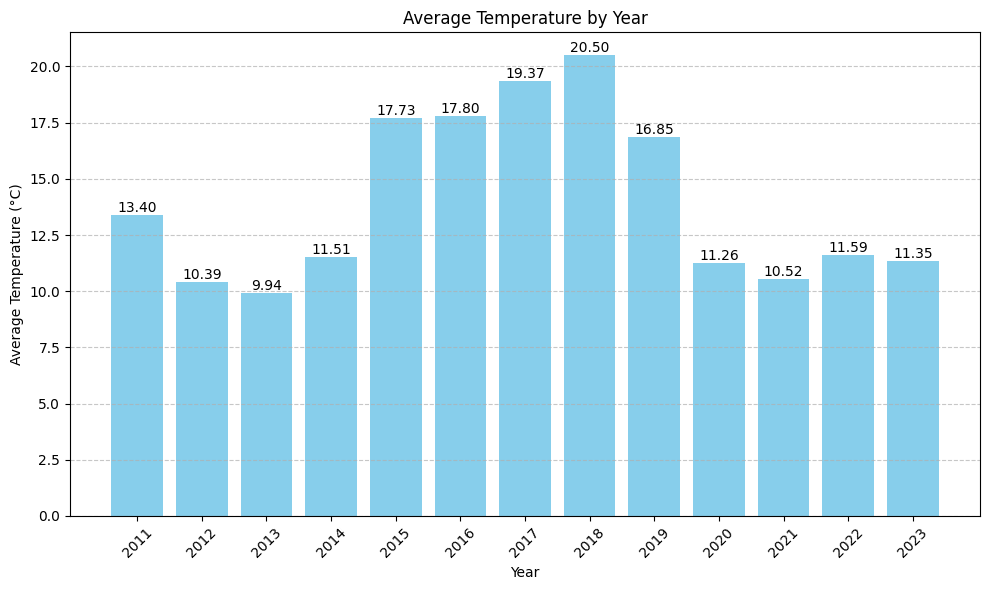

In [16]:
# Calculate average temperatures by year, store them in a list, and create a bar plot with labels and grid.
years = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
average_temperatures = []
for year in years:
    year_data = daily_df[daily_df['year'] == int(year)]
    average_temperature = year_data['Temp'].mean()
    average_temperatures.append(average_temperature)

plt.figure(figsize=(10, 6))
plt.bar(years, average_temperatures, color='skyblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Average Temperature by Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
for i, value in enumerate(average_temperatures):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


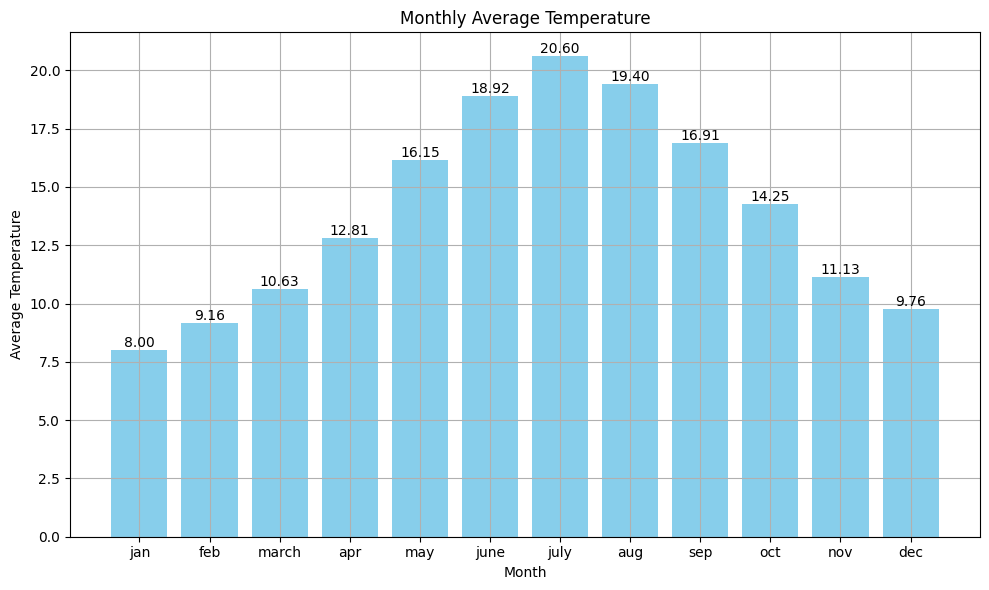

In [26]:
# Calculate monthly average temperatures, store them, and create a bar plot with month labels and grid.
monthly = range(1, 13)
average_temperatures = []
for month in monthly:
    month_data = daily_df[daily_df['month'] == month]
    average_temperature = month_data['Temp'].mean()
    average_temperatures.append(average_temperature)
monthly_Temperature = daily_df.groupby('month')['Temp'].mean()
plt.figure(figsize=(10, 6))

plt.bar(monthly_Temperature.index, monthly_Temperature.values, color='skyblue')
plt.title('Monthly Average Temperature')
plt.xlabel('Month')

plt.ylabel('Average Temperature')
plt.xticks(monthly,['jan','feb','march','apr','may','june','july','aug','sep','oct','nov','dec'])

for i, value in enumerate(monthly_Temperature.values):
    plt.text(i + 1, value, f'{value:.2f}', ha='center', va='bottom')


plt.grid(True)
plt.tight_layout()

plt.show()

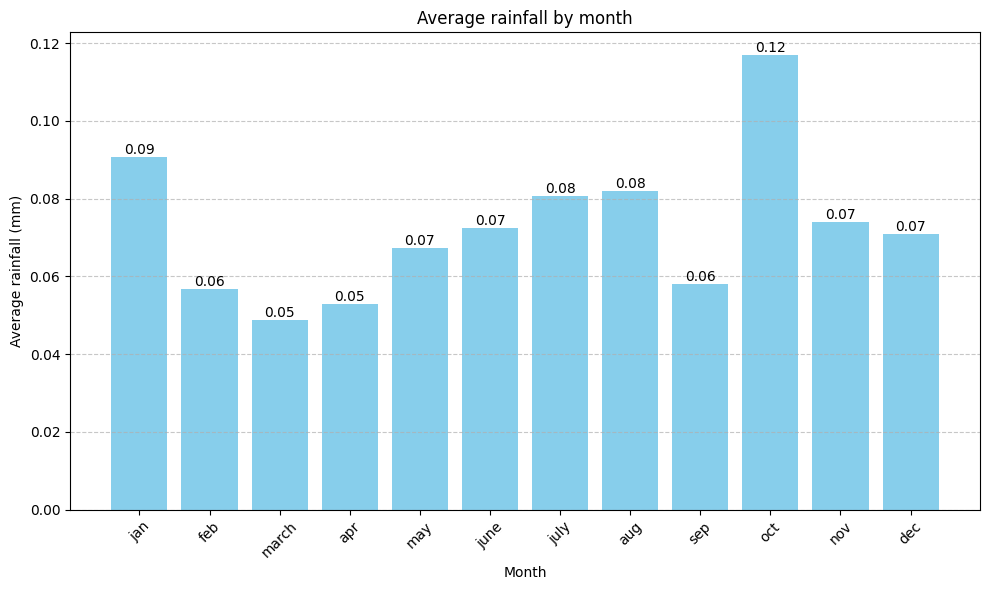

In [29]:
# Calculate monthly average rainfall and create a bar plot with labeled months and grid.
monthly = range(1, 13)
average_rainfall = []
for month in monthly:
    month_data = daily_df[daily_df['month'] == month]
    average_rainfall_for_month = month_data['RainRate'].mean()
    average_rainfall.append(average_rainfall_for_month)
monthly_rainfall = daily_df.groupby('month')['RainRate'].mean()
plt.figure(figsize=(10, 6))
plt.bar(monthly, average_rainfall, color='skyblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Average rainfall by month')
plt.xlabel('Month')
plt.ylabel('Average rainfall (mm)')
plt.xticks(monthly, ['jan','feb','march','apr','may','june','july','aug','sep','oct','nov','dec'], rotation=45)
for i, value in enumerate(average_rainfall):
    plt.text(i + 1, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

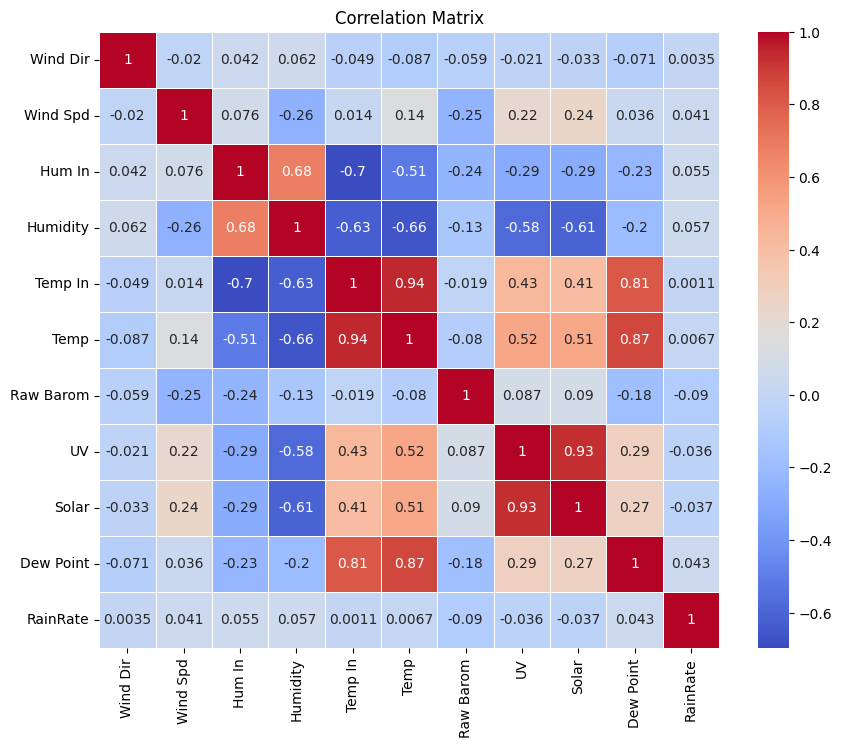

In [ ]:
# Filter data for 2022, drop unnecessary columns, and create a heatmap of the correlation matrix.
year = 2022
daily_df_2022 = daily_df[daily_df['year'] == year].copy()
daily_df_2022.drop(columns=['year','Date','Day','month','Time'], inplace=True)
plt.figure(figsize=(10, 8))
sns.heatmap(daily_df_2022.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Pre Processing

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Filter data from 2011 to 2016, drop unnecessary columns, and calculate the mean for each day.
df = daily_df[(daily_df['year'] >= 2011) & (daily_df['year'] <= 2016)].copy()
df.drop(columns=['year','Date','month','Time'], inplace=True)
df = df.groupby(['Day']).mean()

In [ ]:
print(df.isnull().sum())

Wind Dir        0
Wind Spd        0
Hum In          0
Humidity        0
Temp In         0
Temp            0
Raw Barom       0
UV              0
Solar         750
Dew Point    1467
RainRate     1467
dtype: int64


In [ ]:
# Fill missing values with column means, select specified columns, and standardize them using StandardScaler.
df = df.fillna(df.mean())
req = ['Wind Dir', 'Wind Spd', 'Hum In', 'Humidity', 'Temp In', 'Raw Barom', 'UV', 'Solar', 'Dew Point', 'RainRate']
scaler = StandardScaler()
df[req] = scaler.fit_transform(df[req])

In [ ]:
df.drop_duplicates(inplace=True)
df.head()

,Wind Dir,Wind Spd,Hum In,Humidity,Temp In,Temp,Raw Barom,UV,Solar,Dew Point,RainRate
Day,,,,,,,,,,,
2011-08-05,-0.186447,-0.599387,-0.128507,-0.664814,-0.379260,21.350374,0.778755,1.122046,4.373097,2.510087,-0.955881
2011-08-06,0.200388,-0.231116,-0.270184,0.210153,-0.456131,16.172778,0.765138,0.434285,1.839617,1.688053,-0.955881
2011-08-07,0.404259,0.310363,-0.097936,0.762383,-0.541018,13.971806,0.762833,0.533220,2.390298,1.500761,3.545858
2011-08-10,0.458658,0.912269,-0.129187,-0.136033,-0.530235,16.374583,0.800423,0.898113,3.253128,1.188058,-0.955881
2011-08-11,0.473339,1.093885,0.129308,0.508286,-0.496657,17.386042,0.779052,0.275878,1.539557,2.696793,-0.323625


In [ ]:
# Import necessary modules for data splitting, Random Forest regression, and evaluation metrics.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [ ]:
# Separate target variable 'Temp' from features, then split the data into training and testing sets.
y = df['Temp']
df.drop(columns=['Temp'], inplace=True)
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelling

In [ ]:
# Initialize and train a RandomForestRegressor model with 100 trees using the training data.
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = model_rf.predict(X_test)

In [ ]:
# Calculate and print the Mean Absolute Error, Mean Squared Error, and R^2 Score for the Random Forest model's predictions.
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)


print(f'Mean Absolute Error: {rf_mae}')
print(f'Mean Squared Error: {rf_mse}')
print(f'R^2 Score: {rf_r2}')


Mean Absolute Error: 0.9395037464312526
Mean Squared Error: 1.7050618325943214
R^2 Score: 0.9572971992088434


In [ ]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
xgb = XGBRegressor()
dt = DecisionTreeRegressor(random_state=42)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Initialize and train an XGBoost regressor with specified hyperparameters using the training data.
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)

xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
y_pred_xg_reg = xg_reg.predict(X_test)

In [ ]:
# Calculate and print the Mean Absolute Error, Mean Squared Error, and R^2 Score for the XGBoost model's predictions.
xgb_mae = mean_absolute_error(y_test, y_pred_xg_reg)
xgb_mse = mean_squared_error(y_test, y_pred_xg_reg)
xgb_r2 = r2_score(y_test, y_pred_xg_reg)

print(f'Mean Absolute Error: {xgb_mae}')
print(f'Mean Squared Error: {xgb_mse}')
print(f'R^2 Score: {xgb_r2}')


Mean Absolute Error: 1.3478837660237726
Mean Squared Error: 3.1514384221997207
R^2 Score: 0.921073098596061


In [ ]:
 #Calculate and print the Mean Absolute Error, Mean Squared Error, and R^2 Score for the decision tree model's predictions.
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

print(f'Mean Absolute Error: {dt_mae}')
print(f'Mean Squared Error: {dt_mse}')
print(f'R^2 Score: {dt_r2}')


Mean Absolute Error: 1.3632755100493603
Mean Squared Error: 3.407048052339548
R^2 Score: 0.9146714262886384


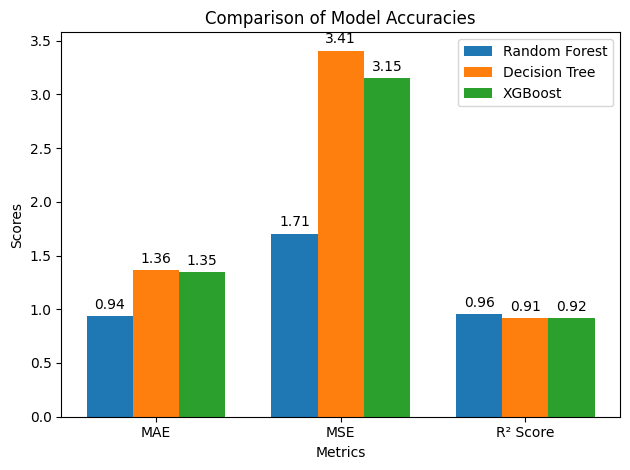

In [ ]:
metrics = ['MAE', 'MSE', 'R² Score'] # Removed 'RMSE' as it wasn't calculated
rf_scores = [rf_mae, rf_mse, rf_r2]
dt_scores = [dt_mae, dt_mse, dt_r2]
xgb_scores = [xgb_mae, xgb_mse, xgb_r2]

x = np.arange(len(metrics)) # Now x will have the correct shape (3,)
width = 0.25

fig, ax = plt.subplots()

bars_rf = ax.bar(x - width, rf_scores, width, label='Random Forest')
bars_dt = ax.bar(x, dt_scores, width, label='Decision Tree')
bars_xgb = ax.bar(x + width, xgb_scores, width, label='XGBoost')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars_rf)
add_labels(bars_dt)
add_labels(bars_xgb)
plt.tight_layout()

plt.show()


Time Series Analysis

In [ ]:
y_test.sort_index(inplace=True)
y_test.head()

,Temp
Day,
2011-08-30,13.735625
2011-09-05,14.360069
2011-09-06,15.315417
2011-09-08,15.446389
2011-09-20,16.472431


In [ ]:
# Sort the test data by index and display the first few rows.
X_test.sort_index(inplace=True)
X_test.head()

,Wind Dir,Wind Spd,Hum In,Humidity,Temp In,Raw Barom,UV,Solar,Dew Point,RainRate
Day,,,,,,,,,,
2011-08-30,1.130739,-0.540845,-0.254741,0.341522,-0.556001,0.792708,0.124140,0.694550,0.859472,-0.955881
2011-09-05,0.337402,1.504652,0.105899,0.355968,-0.579209,0.779832,0.366420,2.093167,1.110544,0.167346
2011-09-06,0.332524,2.302544,0.514451,0.715378,-0.612502,0.770898,-0.178057,-0.085425,2.072758,2.454420
2011-09-08,0.451976,0.794720,0.374669,0.733752,-0.595756,0.775432,0.029707,0.455356,2.153946,-0.955881
2011-09-20,0.211245,0.790936,0.794469,0.678324,-0.598827,0.793532,0.138147,0.849623,2.531644,0.889673


In [ ]:
y_pred = model_rf.predict(X_test)

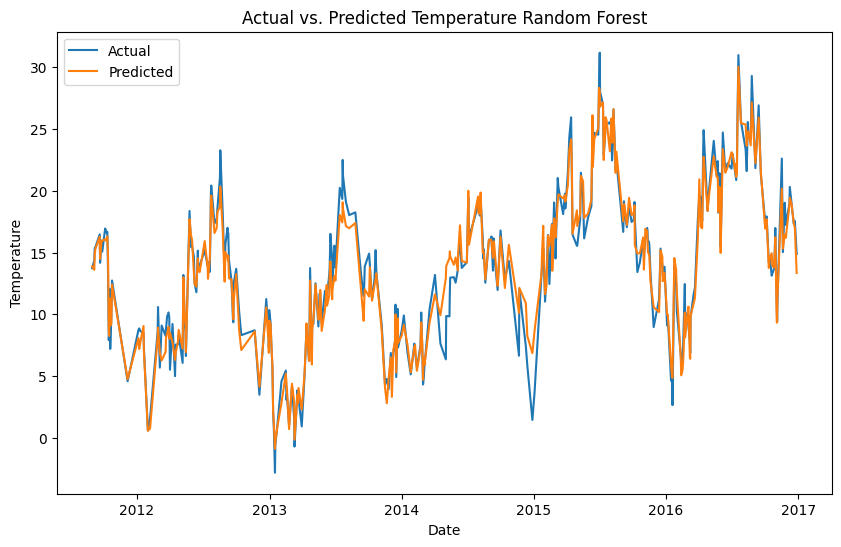

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Actual vs. Predicted Temperature Random Forest')
plt.legend()
plt.show()

In [ ]:
# Generate predictions using the Decision Tree and XGBoost models on the test data.
y_pred_dt = dt.predict(X_test)
y_pred_xg_reg = xg_reg.predict(X_test)

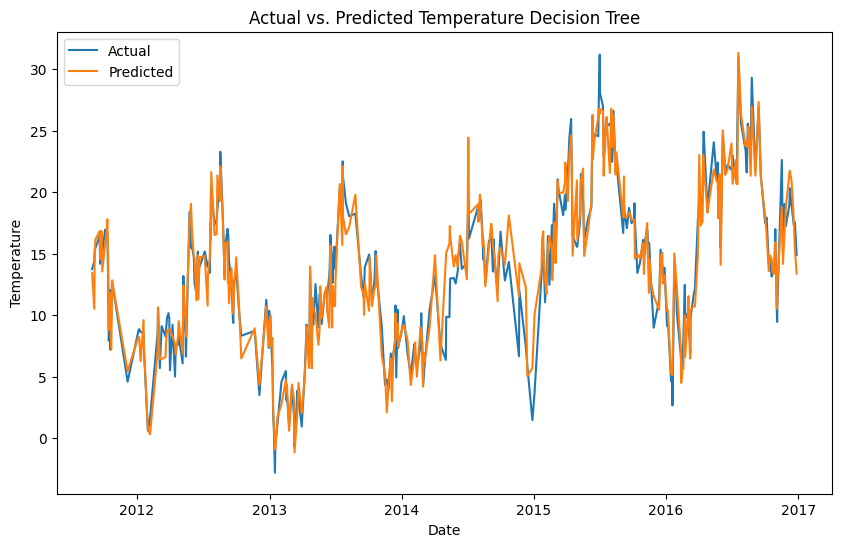

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_dt, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Actual vs. Predicted Temperature Decision Tree')
plt.legend()
plt.show()

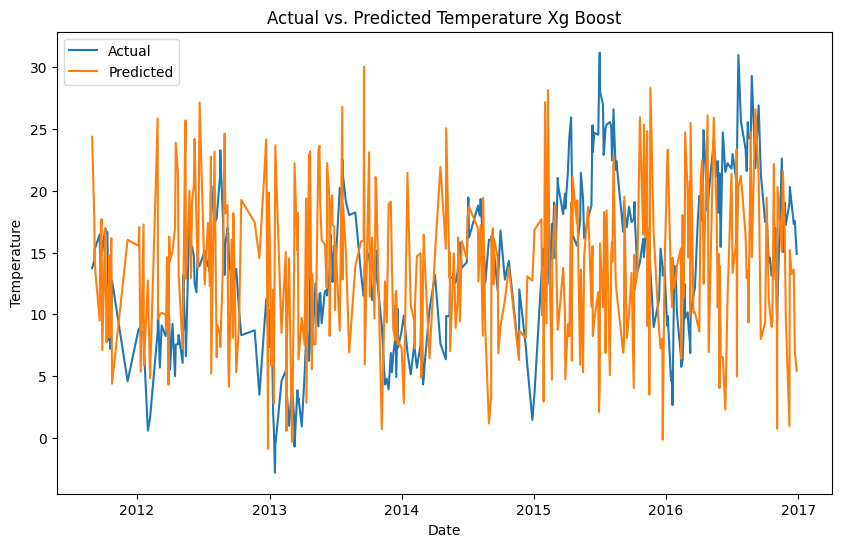

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_rf, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Actual vs. Predicted Temperature Xg Boost')
plt.legend()
plt.show()

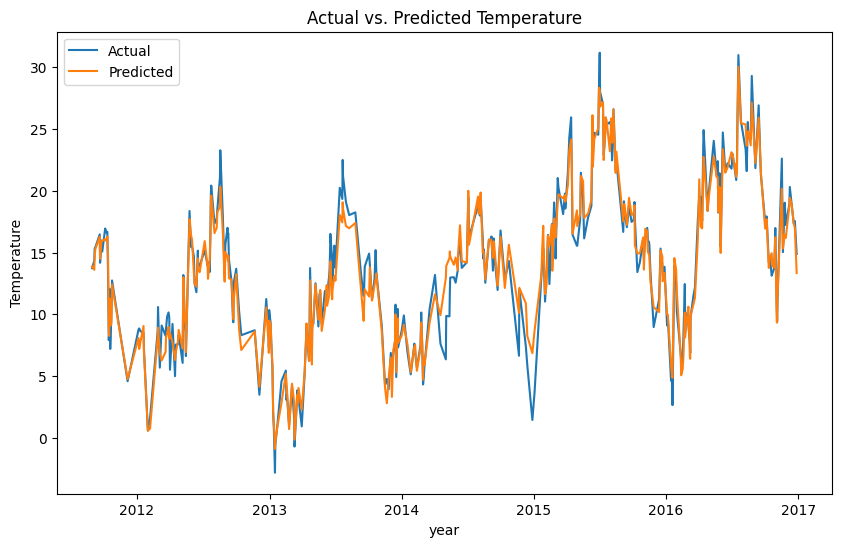

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('year')
plt.ylabel('Temperature')
plt.title('Actual vs. Predicted Temperature')
plt.legend()
plt.show()

In [ ]:
# Create a copy of the original dataframe, drop specified columns, and calculate the mean for each day.
df = daily_df.copy()
df.drop(columns=['year','Date','month','Time'], inplace=True)
df = df.groupby(['Day']).mean()

In [ ]:
# Fill missing values with column means, standardize specified columns, remove duplicate rows, and display the first few rows.
df = df.fillna(df.mean())
req = ['Wind Dir', 'Wind Spd', 'Hum In', 'Humidity', 'Temp In', 'Raw Barom', 'UV', 'Solar', 'Dew Point', 'RainRate']
scaler = StandardScaler()
df[req] = scaler.fit_transform(df[req])
df.drop_duplicates(inplace=True)
df.head()

,Wind Dir,Wind Spd,Hum In,Humidity,Temp In,Temp,Raw Barom,UV,Solar,Dew Point,RainRate
Day,,,,,,,,,,,
2011-08-05,-0.199521,-0.492031,-0.199955,-0.541631,-0.372950,21.350374,0.773584,1.149896,3.132319,1.756180,-0.527870
2011-08-06,0.181420,-0.107679,-0.331867,0.265626,-0.449310,16.172778,0.759953,0.392668,1.189211,1.184425,-0.527870
2011-08-07,0.382184,0.457445,-0.171491,0.775122,-0.533632,13.971806,0.757645,0.501596,1.611568,1.054157,2.061556
2011-08-10,0.435754,1.085636,-0.200589,-0.053770,-0.522921,16.374583,0.795274,0.903345,2.273335,0.836661,-0.527870
2011-08-11,0.450211,1.275183,0.040089,0.540689,-0.489567,17.386042,0.773881,0.218261,0.959074,1.886041,-0.164193


In [ ]:
# Separate the target variable 'Temp' from features, split the data into training and testing sets.
y = df['Temp']
df.drop(columns=['Temp'], inplace=True)
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = model_rf.predict(X_test)

In [ ]:
# Calculate and print the Mean Absolute Error, Mean Squared Error, and R^2 Score for the Random Forest model's predictions.
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Absolute Error: 0.719193935750851
Mean Squared Error: 1.0812372899160474
R^2 Score: 0.9750643126826457


In [ ]:
# Sort the test target and feature data by index, then generate predictions using the trained Random Forest model.
y_test.sort_index(inplace=True)
X_test.sort_index(inplace=True)
y_pred = model_rf.predict(X_test)

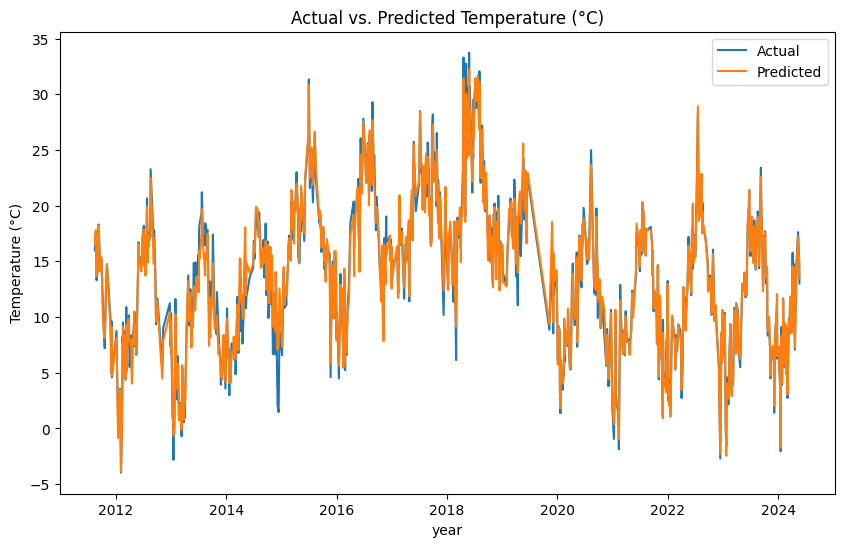

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('year')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs. Predicted Temperature (°C)')
plt.legend()
plt.show()